In [17]:
!nvidia-smi

Sun Oct 26 17:43:26 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 581.57                 Driver Version: 581.57         CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 Ti   WDDM  |   00000000:01:00.0  On |                  N/A |
| 30%   40C    P2             29W /  160W |    5634MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [20]:
!pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cu126

Looking in indexes: https://download.pytorch.org/whl/cu126



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import torch
print(torch.cuda.is_available()) # Should print True
print(torch.version.cuda)       # Should print 12.6
exit()                          # Exit the Python interpreter

True
12.6


: 

In [ ]:
pip install "unstructured[pdf]"

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from unstructured.partition.pdf import partition_pdf

file_path = r"Examples\1706.03762v7.pdf"

chunks = partition_pdf(
    filename=file_path, # path to the PDF file to be partitioned
    infer_table_structure=True, #enables automatic detection and structuring of tables within the document
    strategy="hi_res", #most accurate, but potentially slowest and most resource-intensive, strategy for analyzing a document's layout and content
    extract_image_block_types=["Image", "Tables"], #extracts images and tables locally
    extract_image_block_output_dir="images", #saves images and tables to the specified directory
    extract_image_block_to_payload=True, #metadata with base64
    chunking_strategy="by_title",
    max_characters=10000,
    combine_text_under_n_chars=2000,
    new_after_n_chars=6000,
)

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The requested type (Tables) doesn't match any available type


In [6]:
len(chunks)  # number of document chunks created

12

In [7]:
chunks[1].metadata.orig_elements

In [8]:
chunks[0].to_dict()

{'type': 'CompositeElement',
 'element_id': '6d0161ac1b5f7a8963824054fab6e1e1',
 'text': '3\n\n2023\n\n2\n\n0\n\n2\n\ng u A 2 ] L C . s c [ 7 v 2 6 7 3 0 . 6 0\n\n7\n\n1\n\n:\n\nv\n\narXiv\n\ni\n\nX\n\nr\n\na\n\nProvided proper attribution is provided, Google hereby grants permission to reproduce the tables and figures in this paper solely for use in journalistic or scholarly works.\n\nAttention Is All You Need\n\nAshish Vaswani∗\n\nGoogle Brain\n\navaswani@google.com\n\nNoam Shazeer∗ Google Brain noam@google.com\n\nNiki Parmar∗ Google Research nikip@google.com\n\nJakob Uszkoreit∗\n\nGoogle Research usz@google.com\n\nLlion Jones∗\n\nGoogle Research llion@google.com\n\nAidan N. Gomez∗ † University of Toronto aidan@cs.toronto.edu\n\nŁukasz Kaiser∗ Google Brain lukaszkaiser@google.com\n\nIllia Polosukhin∗ ‡\n\nillia.polosukhin@gmail.com\n\nAbstract\n\nThe dominant sequence transduction models are based on complex recurrent or convolutional neural networks that include an encoder and a dec

In [9]:
elements = chunks[3].metadata.orig_elements
chunk_images = [el for el in elements if 'Image' in str(type(el))]
chunk_images[0].to_dict()

{'type': 'Image',
 'element_id': '3ded4c48-5ef3-4d1e-94eb-709e453b026e',
 'text': '',
 'metadata': {'coordinates': {'points': ((np.float64(486.0),
     np.float64(261.1805555555558)),
    (np.float64(486.0), np.float64(614.7805555555556)),
    (np.float64(664.0), np.float64(614.7805555555556)),
    (np.float64(664.0), np.float64(261.1805555555558))),
   'system': 'PixelSpace',
   'layout_width': 1700,
   'layout_height': 2200},
  'last_modified': '2025-10-25T16:29:38',
  'filetype': 'PPM',
  'languages': ['eng'],
  'page_number': 4,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAFiALIDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJ

In [10]:
tables = []
texts= []
for chunk in chunks:
  if 'Table' in str(type(chunk)):
    tables.append(chunk)
  if 'CompositeElement' in str(type(chunk)):
    texts.append(chunk)

In [11]:
len(texts)

12

In [12]:
print(texts[1])

1 Introduction

Recurrent neural networks, long short-term memory [13] and gated recurrent [7] neural networks in particular, have been firmly established as state of the art approaches in sequence modeling and transduction problems such as language modeling and machine translation [35, 2, 5]. Numerous efforts have since continued to push the boundaries of recurrent language models and encoder-decoder architectures [38, 24, 15].

Recurrent models typically factor computation along the symbol positions of the input and output sequences. Aligning the positions to steps in computation time, they generate a sequence of hidden states ht, as a function of the previous hidden state ht−1 and the input for position t. This inherently sequential nature precludes parallelization within training examples, which becomes critical at longer sequence lengths, as memory constraints limit batching across examples. Recent work has achieved significant improvements in computational efficiency through fact

In [13]:
def get_images_base64(chunks):
  image_64=[]
  for chunk in chunks:
    if 'CompositeElement' in str(type(chunk)):
      chunk_el =chunk.metadata.orig_elements
      for el in chunk_el:
        if 'Image' in str(type(el)):
          image_64.append(el.metadata.image_base64)
  return image_64
images = get_images_base64(chunks)

In [14]:
len(images)

7

In [ ]:
import base64
from IPython.display import Image, display

def display_image_base64(base64_code):
  image_data= base64.b64decode(base64_code) #decode base64 to binary
  display(Image(data=image_data))

display_image_base64(images[2])

AttributeError: type object 'Image' has no attribute 'open'

In [1]:
from transformers import LlavaNextProcessor, LlavaNextForConditionalGeneration, BitsAndBytesConfig
import torch
from PIL import Image
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_type=torch.float16
)

model = LlavaNextForConditionalGeneration.from_pretrained(
    "llava-hf/llava-v1.6-mistral-7b-hf",
    quantization_config=quantization_config,
    low_cpu_mem_usage=True,
)
processor = LlavaNextProcessor.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf")



prompt_text = """
You are an assistant tasked with summarizing tables and text.
Give a concise summary of the table or text.

Respond only with the summary, no additionnal comment.
Do not start your message by saying "Here is a summary" or anything like that.
Just give the summary as it is.

Table or text chunk: {element}
"""

print(f"{model.num_parameters() / 1e9:.2f}B parameters")
print(model)






c:\Users\sauca\Desktop\Bachelors\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 4/4 [00:16<00:00,  4.23s/it]
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


7.57B parameters
LlavaNextForConditionalGeneration(
  (model): LlavaNextModel(
    (vision_tower): CLIPVisionModel(
      (vision_model): CLIPVisionTransformer(
        (embeddings): CLIPVisionEmbeddings(
          (patch_embedding): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14), bias=False)
          (position_embedding): Embedding(577, 1024)
        )
        (pre_layrnorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (encoder): CLIPEncoder(
          (layers): ModuleList(
            (0-23): 24 x CLIPEncoderLayer(
              (self_attn): CLIPAttention(
                (k_proj): Linear4bit(in_features=1024, out_features=1024, bias=True)
                (v_proj): Linear4bit(in_features=1024, out_features=1024, bias=True)
                (q_proj): Linear4bit(in_features=1024, out_features=1024, bias=True)
                (out_proj): Linear4bit(in_features=1024, out_features=1024, bias=True)
              )
              (layer_norm1): LayerNorm((1024,), ep

In [2]:
prompt = ChatPromptTemplate.from_template(prompt_text)
sumarrize_chain = {"element": lambda x:x} | prompt | model | StrOutputParser()

In [16]:
text_sumaries = sumarrize_chain.batch(texts, {'max_concurrency':3})
tables_html = [table.metadata.text_as_html for table in tables]
tables_sumaries = sumarrize_chain.batch(tables_html, {'max_concurrency':3})

TypeError: embedding(): argument 'indices' (position 2) must be Tensor, not ChatPromptValue

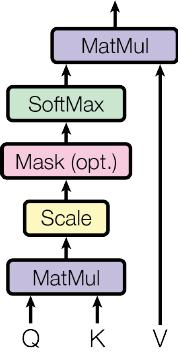

AttributeError: type object 'Image' has no attribute 'Image'

In [24]:
prompt_template = """USER: <image>
Describe the image in detail. For context, the image is part 
of a research paper explaining the transformers architecture. 
Be specific about graphs, such as bar plots.
ASSISTANT:"""
messages = [
    (
        "user",
        [
            {"type": "text", "text": prompt_template},
            {
                "type": "image_url",
                "image_url": {"url": "data:image/jpeg;base64,{image}"},
            },
        ],
    )
]

if not isinstance(display_image_base64(images[1]), Image.Image):
     raise TypeError(f"Expected a PIL Image object, but got {type(display_image_base64(images[1]))}")

# prompt = processor.apply_chat_template(messages, add_generation_prompt=True)

inputs = processor(text=prompt_text, images=display_image_base64(images[1]), return_tensors="pt").to(model.device)

try:
    output = model.generate(**inputs, max_new_tokens=512)
except Exception as e:
    print(f"Error during model generation: {e}")
    # Handle error appropriately

# 5. Decode and print the response
response = processor.decode(output[0], skip_special_tokens=True)

# Clean up the response (remove the prompt part)
assistant_marker = "ASSISTANT:"
marker_pos = response.rfind(assistant_marker)
if marker_pos != -1:
    cleaned_response = response[marker_pos + len(assistant_marker):].strip()
else:
    cleaned_response = response # Fallback if marker not found

print(cleaned_response)